#Análise da Base de Dados e Classificação 

Projeto Venda de Carros

Iremos importar a base de dados que vamos trabalhar. 

Esta base de dados contém as seguintes informações sobre carros (Dados - milhas/ano, modelo/ano, preço e vendido), com a análise e classificação dos dados podemos determinar a probabilidade de um determinado carro ser revendido ou não.


Iremos trazer esses dados sobre 10.000 carros em um dataframe com Pandas.

In [ ]:
#Importando o Pandas e Lendo arquivo csv com a base de dados.

import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv"
dados = pd.read_csv(uri)
dados

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes
...,...,...,...,...,...
9995,9995,15572,2006,97112.86,no
9996,9996,13246,2002,107424.63,yes
9997,9997,13018,2014,93856.99,no
9998,9998,10464,2011,51250.57,yes


#Renomeando as colunas do DataFrame

In [ ]:
a_renomear = {
    'mileage_per_year' : 'milhas_por_ano',
    'model_year' : 'ano_modelo',
    'price' : 'preco',
    'sold' : 'vendido'
}
dados = dados.rename(columns = a_renomear)
dados.head()

,Unnamed: 0,milhas_por_ano,ano_modelo,preco,vendido
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


#Substituindo 'yes/no' por 0 ou 1 na coluna vendido

In [ ]:
a_trocar = {
    'no' : 0,
    'yes' : 1
}
dados.vendido = dados.vendido.map(a_trocar)
dados.head()

,Unnamed: 0,milhas_por_ano,ano_modelo,preco,vendido
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1


#Calculando a idade do carro com base no ano de modelo e criando coluna idade_modelo

In [ ]:
from datetime import datetime

ano_atual = datetime.today().year
dados['idade_modelo'] = ano_atual - dados.ano_modelo  
dados.head()

,Unnamed: 0,milhas_por_ano,ano_modelo,preco,vendido,idade_modelo
0,0,21801,2000,30941.02,1,21
1,1,7843,1998,40557.96,1,23
2,2,7109,2006,89627.50,0,15
3,3,26823,2015,95276.14,0,6
4,4,7935,2014,117384.68,1,7


#Convertendo milhas por km's por ano e criando coluna km_ano

In [ ]:
dados['km_ano'] = dados.milhas_por_ano * 1.60934
dados.head()

,Unnamed: 0,milhas_por_ano,ano_modelo,preco,vendido,idade_modelo,km_ano
0,0,21801,2000,30941.02,1,21,35085.22134
1,1,7843,1998,40557.96,1,23,12622.05362
2,2,7109,2006,89627.50,0,15,11440.79806
3,3,26823,2015,95276.14,0,6,43167.32682
4,4,7935,2014,117384.68,1,7,12770.11290


#Excluindo colunas que não serão mais usadas

In [ ]:
dados = dados.drop(columns = ['Unnamed: 0', 'milhas_por_ano','ano_modelo'], axis= 1)
dados.head()

,preco,vendido,idade_modelo,km_ano
0,30941.02,1,21,35085.22134
1,40557.96,1,23,12622.05362
2,89627.50,0,15,11440.79806
3,95276.14,0,6,43167.32682
4,117384.68,1,7,12770.11290


#Analisando com modelo LinearSVC e np.random.seed

Organizamos os eixos (X e Y) entre X = preço, idade_modelo e km_ano e Y = vendido, separamos os dados que usaremos para teste e treino, criamos um modelo com LinearSVC(), um modelo de treinos e um modelo de previsões.

Após classificarmos e treinarmos com os dados, podemos determinar a acurácia do nosso modelo.

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

x = dados[['preco','idade_modelo','km_ano']]
y = dados['vendido']

SEED = 5
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size=0.25, stratify=y)

print("Treinaremos com %d elementos e testaremos %d elementos." % (len(treino_x), len(teste_x)))

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("\nA acurácia foi %.2f%%\n" % acuracia)

Treinaremos com 7500 elementos e testaremos 2500 elementos.

A acurácia foi 58.00%



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


#Estimador com sklearn dummy_classifier (Classificador "Bobo")

Isso porque ele possui várias estratégias bem simples de classificação, e que podem ser passadas como parâmetro.

* *class sklearn.dummy.DummyClassifier(strategy=’stratified’, random_state=None, constant=None)[source]*

Para definirmos se esse resultado é bom ou ruim, ainda precisamos de uma base comparativa, estipulando qual seria o mínimo de acerto aceitável.

Estamos em busca da nossa linha de base (parâmetro que devemos alcançar para determinar qual modelo é mais eficiente na classificação dos dados).

Para nossos testes, primeiramente importaremos esse classificador e criaremos a variável dummy como padrão. Em seguida, trabalharemos com os métodos tradicionais fit() e predict(), exatamente como no LinearSVC.

Depois do treino, o DummyClassifier() irá prever os resultados e imprimiremos sua acurácia na tela.

In [ ]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier()
dummy.fit(treino_x, treino_y)
previsoes = dummy.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia do dummy foi %.2f%%\n" % acuracia)

A acurácia do dummy foi 58.00%



In [ ]:
from sklearn.dummy import DummyClassifier

dummy_stratified = DummyClassifier() 
dummy_stratified.fit(treino_x, treino_y)
acuracia = dummy_stratified.score(teste_x, teste_y) * 100

print("A acurácia do dummy_stratified foi %.2f%%\n" % acuracia)

A acurácia do dummy_stratified foi 58.00%



In [ ]:
from sklearn.dummy import DummyClassifier

dummy_mostfrequent = DummyClassifier() 
dummy_mostfrequent.fit(treino_x, treino_y)
acuracia = dummy_mostfrequent.score(teste_x, teste_y) * 100

print("A acurácia do dummy_mostfrequent foi %.2f%%" % acuracia)

A acurácia do dummy_mostfrequent foi 58.00%


#Reescalando os dados com StandartScaler e modelo SVC

* Determinamos o nosso SEED (semente) - Parâmetro Inicial para os testes.
* Separamos os dados em treino e teste.
* Treinamos com os dados originais raw_treino_x e raw_teste_x.
* Tiramos a média dos dados com o StandartScaler e trazemos o desvio padrão dos dados, reescalamos os dados.
* Treinamos o modelo SVC().
* E temos um modelo mais eficaz com uma taxa de acurácia maior que nos testes anteriores.

Utilizando o StandartScaler e o modelo SVC() combinados tivemos um ganho considerável na taxa de acurácia!

Com esse resultado, tivemos um ganho muito grande de acurácia em relação à baseline - aproximadamente 25% de ganho absoluto e 48% de ganho relativo.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size=0.25, stratify=y)

print("Treinaremos com %d elementos e testaremos %d elementos" % (len(treino_x), len(teste_x)))

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("\nA acurácia foi %.2f%%" % acuracia)

Treinaremos com 7500 elementos e testaremos 2500 elementos

A acurácia foi 77.48%


#Analisando com sklearn e DecisionTreeClassifier

Até o momento, utilizamos dois classificadores reais baseados em Support Vector Machine, o LinearSVC e SVC. Usamos, ainda, dois classificadores simples (Dummy Classifiers) para definir nosso baseline.

Com o SVC, depois de reescalarmos os dados, a acurácia tem um ganho impressionante. Porém, ainda não temos um algoritmo de classificação que nos forneça suas regras internas para que possamos entender como certas decisões são tomadas.

Existem algoritmos que exibem uma sequência de decisões com base nos dados fornecidos, como por exemplo um carro ter menos quilometragens rodadas e ser mais novo, e como essas decisões influenciam na classificação, em uma espécie de "árvore de decisões".

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size=0.25, stratify=y)

print("Treinaremos com %d elementos e testaremos %d elementos" % (len(treino_x), len(teste_x)))

modelo = DecisionTreeClassifier(max_depth=3)
modelo.fit(raw_treino_x, treino_y)
previsoes = modelo.predict(raw_teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 7500 elementos e testaremos 2500 elementos
A acurácia foi 79.28%


#Exportando gráfico da árvore de decisão com graphviz

Utilizamos um classificador que nos permite visualizar como as decisões do algorítimo são tomadas.

Uma das características que podem ser trabalhadas para otimizar a interpretação de uma árvore de decisões é a profundidade (max_depth): quantas condições diferentes queremos que o algoritmo analise antes de fazer a classificação.



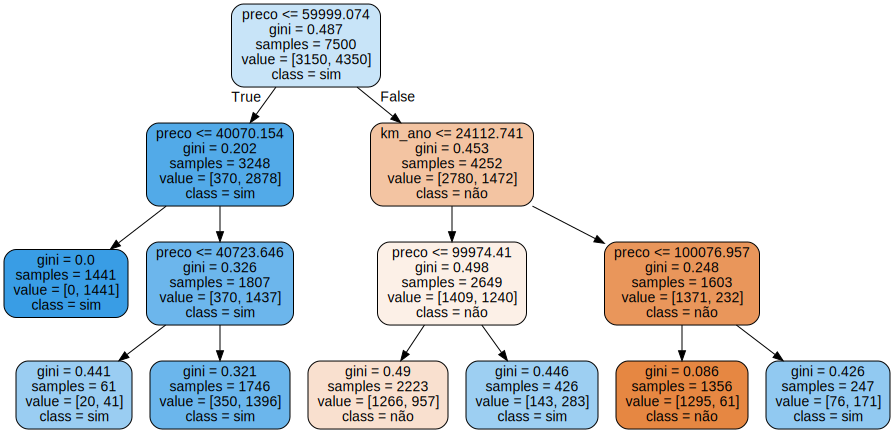

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

features = x.columns
dot_data = export_graphviz(modelo, out_file=None,
                           filled =True, rounded=True,
                           feature_names = features,
                           class_names = ['não', 'sim'])
grafico = graphviz.Source(dot_data)
grafico

#Explicando os resultados da Árvore de Decisão

No primeiro quadro, temos preço: 59999.074. Se o preço for menor ou igual a este valor, o carro será enquadrado na classe "sim", e nosso algoritmo tomará a decisão de que ele será vendido. Se o preço for menor ou igual a 40070.156, o algoritmo também decidirá que ele será vendido. A decisão também será positiva se o preço for maior que este valor, mas com um pouco menos de certeza (representada por um tom mais claro de azul).

Se o preço for maior que 59999.074, o classificador tomará uma decisão negativa. A próxima decisão será tomada de acordo com km_por_ano: se este valor for maior que 24112.742, o algoritmo decidirá que o carro não será vendido; se for menor ou igual, a decisão será a mesma, mas com uma certeza menor.

Existem outras informações na árvore de decisão, por exemplo samples, que nos mostra quantos dados são enquadrados em determinada situação. No primeiro quadro ,o valor de samples será de 7500, pois essa é a quantidade total de dados que disponibilizamos; no segundo quadro da esquerda (em azul), teremos 3248, com o restante (4252) no quadro da esquerda (em tom salmão); e assim por diante.

Para medir se vale a pena quebrar a árvore em dois pedaços em cada uma das decisões, o algoritmo utiliza diversos parâmetros. Um deles é o gini, que também é exibido nesses quadros.